# Assignment 1

Karolina Chlopicka, 15716546 <br>
Shania Sinha, 14379031 <br>
Salomé Poulain, 00000000

In [10]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1:

Creating and visualizing an example of the Mandelbrot set.

In [11]:
# Computing the mandelbrot-set
def build_mandelbrot(X, Y, bound, power, max_iter):
    """ Compute the mandelbrot set
    
    Inputs:
        X: x values
        Y: y values
        bound: threshold for the mandelbrot set
        power: complex power
        max_iter: number of iterations per point
    
    Output: list of lists of integers (mandelbrot set coordinates)
    """
    # TODO: vectorize/parallelize this function
    mandelbrot_set = []
    for y in Y:
        row = []
        for x in X:
            c = complex(x,y)
            z = 0
            for i in range(max_iter):
                if(abs(z) >= bound):
                    row.append(i)
                    break
                else: z = z**power + c
            else:
                row.append(0)

        mandelbrot_set.append(row)
    return mandelbrot_set

In [12]:
# Setting parameters
X, Y = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2             
max_iter = 100   
colormap = 'magma'   

In [13]:
# Calling the function to compute the mandelbrot-set
mandelbrot_set = build_mandelbrot(X, Y, bound, power, max_iter)

Text(0.5, 1.0, 'Mandelbrot set for $z_{new} = z^{power} + c$')

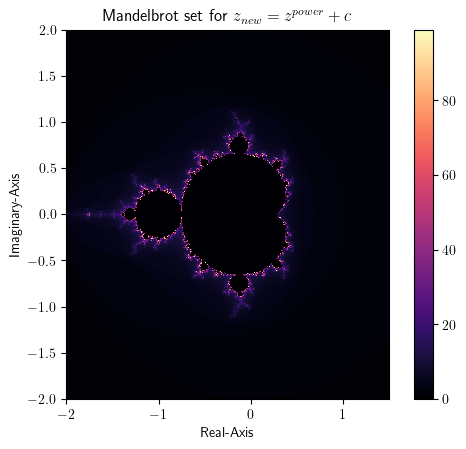

In [14]:
# Plotting
ax = plt.axes()
ax.set_aspect('equal')
graph = ax.pcolormesh(X, Y, mandelbrot_set, cmap = colormap, shading='auto')
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title(f"Mandelbrot set for $z_{{new}} = z^{{power}} + c$")
# plt.show()

## Problem 2:

Investigating the area of the Mandelbrot set $A_M$ using Monte Carlo integration. $A_{i,s}$ denotes an estimate of an area, where $i$ refers to a number of iterations and $s$ refers to number of samples drawn.  

In [16]:
# Function to check if a point is in the Mandelbrot set
def check_mandelbrot(x,y):
    c = complex(x,y)
    z = 0
    for j in range(100):
        if(abs(z) >= bound):
            answer = 0
            break
        else: z = z**2 + c
    else:
        answer = 1
    return(answer)

In [18]:
# Monte Carlo simulation
def monte_carlo(i,s):
    iterations = i  # Number of iterations
    sample_size = s # Number of samples 
    size_iterations = np.zeros(iterations)

    for j in range(iterations):
        
        point_in = np.zeros(sample_size)    # Storing points inside the Mandelbrot set
        point_out = np.zeros(sample_size)   # Storing points outside the Mandelbrot set
        
        for i in range(sample_size):
        # Generating number of point equivalent to the sample size within the bounding rectangle
        # X in (-2,1.5) and Y in (-2,2)
            x_cordinate = np.random.uniform(-2,1.5) 
            y_cordinate = np.random.uniform(-2,2)

            if(check_mandelbrot(x_cordinate,y_cordinate)==1):
                point_in[i] = 1
            
            else: 
                point_out[i] = 1

        size = (np.count_nonzero(point_in == 1)/sample_size)*(3.5*4)
        size_iterations[j] = size   
    
    average_size = np.mean(size_iterations)  
    
    # return(f"For {i} iternations and sample size equal to {s} $A_i_s$ = {average_size}")
    return(average_size)

In [ ]:
#  Testing the function
monte_carlo(100,1000)

1.56912

### 2.1: Convergence of $A_{i,s} \rightarrow A_M$ 

We set the sample size to $s=1000$, and investigate the convergence of the area when changing the number of iterations for all $j<i$ such that $i = 3000$ and $j = \{100k: k \in \{1, 2, ..., 30\}\}$

In [21]:
number_of_iterations = np.array([100*i for i in range(1,31)])
estimation = np.zeros(len(number_of_iterations)) # Store the results of estimated area 

for i in range(len(number_of_iterations)):   
    iterations = number_of_iterations[i]   
    estimation[i] = monte_carlo(iterations,1000)
print(estimation)  

[1.55624    1.52908    1.53234667 1.536885   1.548764   1.54464333
 1.54302    1.5486275  1.54762222 1.549548   1.54254545 1.54943833
 1.54690308 1.54531    1.542744   1.5505525  1.54486706 1.54733444
 1.54649158 1.54952    1.55208    1.54927182 1.54389565 1.5495375
 1.5415512  1.54857769 1.54833259 1.545265   1.54746828 1.544662  ]


Text(0, 0.5, 'Difference in the estimated area: $\\parallel A(j,1000) - A(3000,1000) \\parallel$')

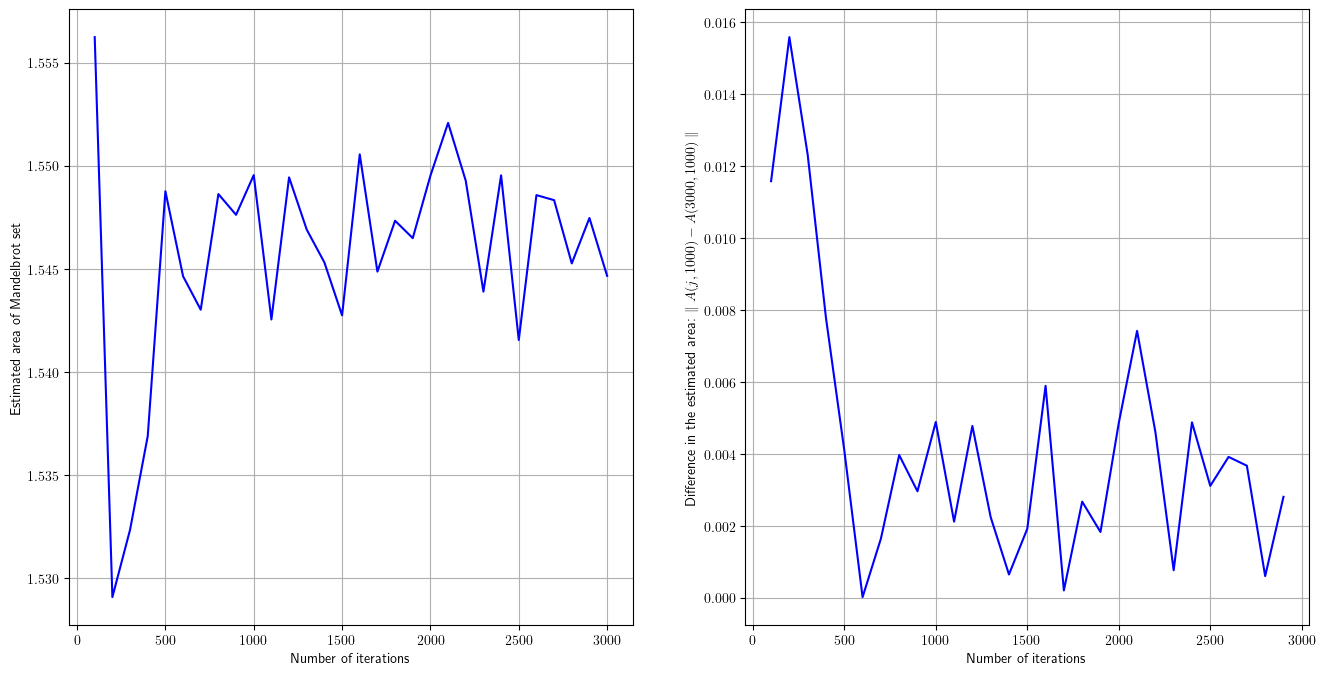

In [31]:
figure_1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plotting the estimated area of the Mandelbrot set
ax1.plot(number_of_iterations,estimation, color = "blue")
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("Estimated area of Mandelbrot set")
ax1.grid(True)
ax2.grid(True)

# Plotting the difference in the estimated area
max_i = estimation[-1]
difference = np.abs(estimation[0:-1] - max_i)
ax2.plot(number_of_iterations[0:-1],difference, color = "blue")
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("Difference in the estimated area: $\parallel A(j,1000) - A(3000,1000) \parallel$")

## Problem 3: Different Sampling Methods

Explore different sampling methods. Namely:
1. Pure random sampling
2. Latin Hypercube sampling
3. Orthogonal sampling. 